<a href="https://colab.research.google.com/github/Ionetxu/master-data-science/blob/master/Keras_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import glob
import random

import gym
import numpy as np
from sklearn import metrics, manifold
from matplotlib import pyplot as plt

import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14060652271831077511, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13160252489116074996
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10455883546187731554
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11276946637
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15839635368354081834
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
import keras
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, LSTM, Conv1D, MaxPool1D
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import np_utils 
from keras.datasets import mnist
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import sequence
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam

In [5]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

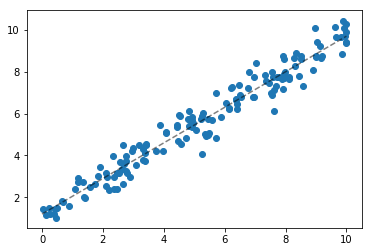

In [6]:
X = np.random.uniform(0, 10, size=(150, 1))
Y = X * .85 + 1.2 + np.random.randn(X.shape[0], X.shape[1]) * .5
plt.scatter(X, Y)
plt.plot([0, 10], [1.2, 10 * .85 + 1.2], 'k--', alpha=.5)

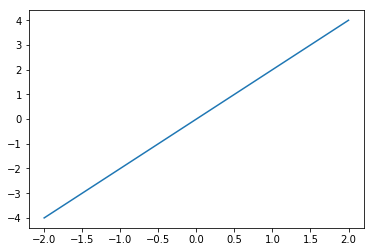

In [7]:
plt.plot(np.arange(-2, 2.1, 1e-1), np.arange(-2, 2.1, 1e-1) * 2)

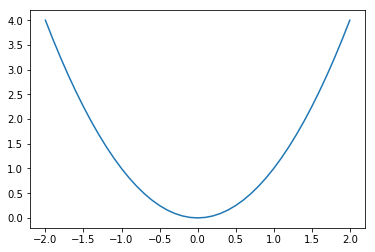

In [8]:
plt.plot(np.arange(-2, 2.1, 1e-1), np.arange(-2, 2.1, 1e-1) ** 2)

In [0]:
#inicializamos X e Y del grafo
X_ = tf.placeholder(tf.float32, shape=[None, 1], name='X_')
Y_ = tf.placeholder(tf.float32, shape=[None, 1], name='Y_')

#w = tf.Variable(np.random.randn(), name="weight")
w = tf.Variable(tf.constant(.4), name="weight", dtype=tf.float32)

#b = tf.Variable(np.random.randn(), name="bias")
b = tf.Variable(tf.constant(-2.), name="bias")

h = tf.add(tf.multiply(X_, w), b)

# RMSE
error = tf.reduce_mean(tf.pow(h - Y_, 2))

# Optimizer
#lr = .01
#optimizer = tf.train.GradientDescentOptimizer(lr).minimize(error)
lr = .005
optimizer = tf.train.AdamOptimizer(lr).minimize(error)

# Initializer
init = tf.global_variables_initializer()

In [16]:
training_epochs = 12
ws, bs = [], []

with tf.Session() as ss:
  ss.run(init)
  for epoch in range(training_epochs):
    indices = [x for x in range(X.size)]
    random.shuffle(indices)
    acc_error = 0.
    for i in indices:
      w_, b_, err, _ = ss.run([w, b, error, optimizer],
                              feed_dict={X_ : X[i].reshape(1, 1),
                                         Y_ : Y[i].reshape(1, 1)})
      acc_error += err
    ws.append(w_)
    bs.append(b_)
    acc_error /= len(indices)
    print('Epoch {}, error: {:.3f}, slope: {:.2f}, bias: {:.2f}'.format(
        epoch, acc_error, w_, b_))

Epoch 0, error: 15.761, slope: 0.92, bias: -1.38
Epoch 1, error: 2.647, slope: 1.13, bias: -1.06
Epoch 2, error: 1.356, slope: 1.16, bias: -0.90
Epoch 3, error: 1.192, slope: 1.16, bias: -0.74
Epoch 4, error: 1.073, slope: 1.13, bias: -0.61
Epoch 5, error: 0.965, slope: 1.09, bias: -0.47
Epoch 6, error: 0.854, slope: 1.09, bias: -0.31
Epoch 7, error: 0.758, slope: 1.07, bias: -0.18
Epoch 8, error: 0.666, slope: 1.03, bias: -0.05
Epoch 9, error: 0.597, slope: 1.02, bias: 0.09
Epoch 10, error: 0.532, slope: 1.00, bias: 0.21
Epoch 11, error: 0.478, slope: 0.98, bias: 0.33


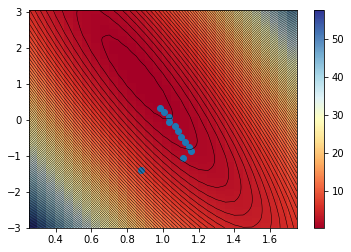

In [12]:
w_values, b_values = np.meshgrid(np.arange(.25, 1.76, .05), np.arange(-3, 3.1, .05))
error_values = np.zeros(w_values.shape)
for i in range(w_values.shape[0]):
  for j in range(w_values.shape[1]):
    error = 0
    for x, y in zip(X, Y):
      error += (y - (x * w_values[i, j] + b_values[i, j])) ** 2
    error_values[i, j] = error / X.shape[0]
plt.contour(w_values, b_values, error_values, 100, linewidths=0.5, colors='k')
plt.pcolormesh(w_values, b_values, error_values, cmap=plt.get_cmap('RdYlBu'))
plt.colorbar()

plt.scatter(ws, bs)

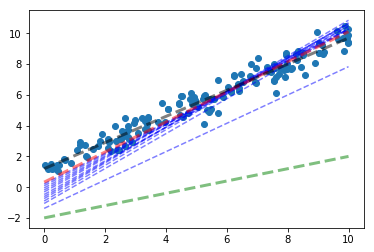

In [17]:
plt.scatter(X, Y)
for i in range(len(ws) -1):
  plt.plot([0, 10], [bs[i], 10 * ws[i] + bs[i]], 'b--',
           alpha=.5, label='learning')
plt.plot([0, 10], [b_, 10 * w_ + b_], 'r--', alpha=.5, lw=3, label='last epoch')
plt.plot([0, 10], [1.2, 10 * .85 + 1.2], 'k--', alpha=.5, lw=3, label='true')
plt.plot([0, 10], [-2., 10 * .4 - 2.], 'g--', alpha=.5, lw=3, label='initial')
#plt.legend()

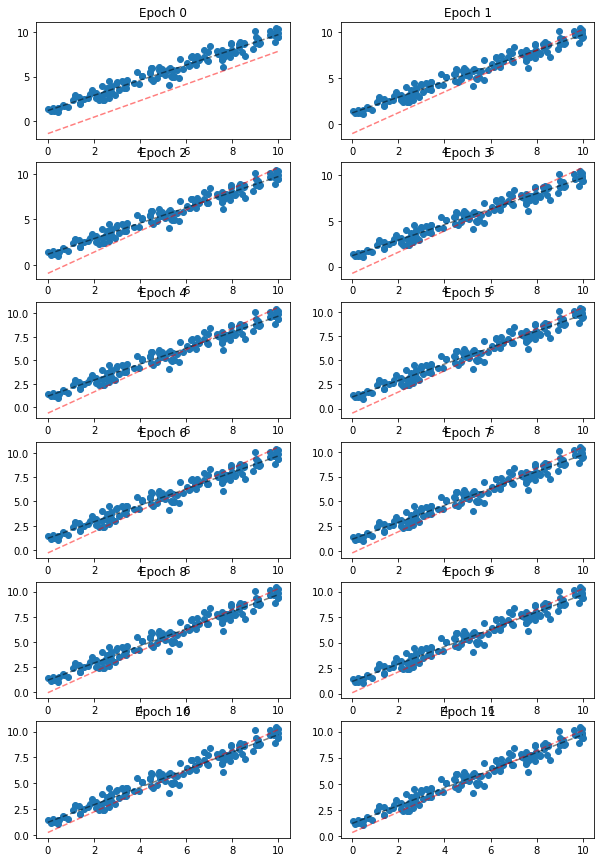

In [18]:
fig, axs = plt.subplots(int(training_epochs / 2), 2, figsize=(10, 15))
for i, ax in enumerate(axs.reshape(-1)):
  ax.set_title('Epoch {}'.format(i))
  ax.scatter(X, Y)
  ax.plot([0, 10], [1.2, 10 * .85 + 1.2], 'k--', alpha=.5, label='true')
  ax.plot([0, 10], [bs[i], 10 * ws[i] + bs[i]], 'r--', alpha=.5,
          label='learned @ {}'.format(i))

In [28]:
#solo tine 1 input o una x, y dense=1 es que tiene 1 neurona. Use_bias= es la b, y es TRUE por default
inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD(lr=0.001, momentum=0.0)
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
model.fit(X, Y, batch_size=1, epochs=50, shuffle=True)

Epoch 1/50
150/150 [==============================] - 1s 4ms/step - loss: 1.7874 - mean_squared_error: 1.7874
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5168 - mean_squared_error: 0.5168
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4847 - mean_squared_error: 0.4847
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4695 - mean_squared_error: 0.4695
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4318 - mean_squared_error: 0.4318
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4242 - mean_squared_error: 0.4242
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4033 - mean_squared_error: 0.4033
Epoch 8/50
150/150 [==============================] - 0s 3ms/step - loss: 0.3872 - mean_squared_error: 0.3872
Epoch 9/50
150/150 [==============================] - 0s 3ms/step - loss: 0.3789 - mean_squared_error: 0.3789
Epoch 10/5

In [30]:
model.get_weights()

[array([[0.8536957]], dtype=float32), array([1.1503108], dtype=float32)]

In [0]:
def xentropy(true, pred):
  return -(true * np.log(pred) + (1 - true) * np.log(1 - pred))

In [0]:
y_true, y_pred = np.meshgrid(np.arange(0.1, 1., .01), np.arange(0.1, 1., .01))
error = np.zeros(y_true.shape)

for i in range(y_true.shape[0]):
  for j in range(y_true.shape[1]):
    error[i, j] = xentropy(y_true[i, j], y_pred[i, j])

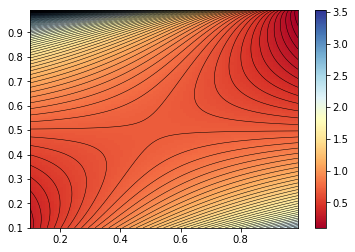

In [33]:
plt.contour(y_true, y_pred, error, 100, linewidths=0.5, colors='k')
plt.pcolormesh(y_true, y_pred, error, cmap=plt.get_cmap('RdYlBu'))
plt.colorbar()

In [0]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

In [36]:
softmax(np.array([3., 1., .5]))

array([0.82140902, 0.11116562, 0.06742536])

In [37]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# 784 neuronas
input_dim = 784 #28*28 
#normalizo los valores
X_train = X_train.reshape(60000, input_dim).astype('float32') / 255
X_test = X_test.reshape(10000, input_dim).astype('float32') / 255

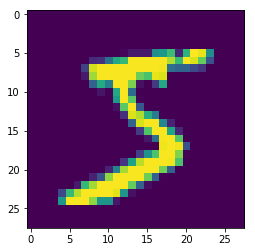

In [39]:
plt.imshow(X_train[0].reshape(28, 28))

In [40]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

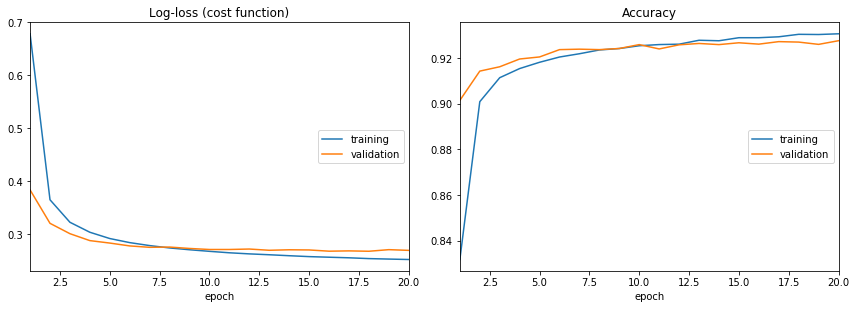

Log-loss (cost function):
training   (min:    0.252, max:    0.678, cur:    0.252)
validation (min:    0.268, max:    0.383, cur:    0.269)

Accuracy:
training   (min:    0.832, max:    0.931, cur:    0.931)
validation (min:    0.901, max:    0.927, cur:    0.927)
Train score: 0.24830341106454532
Train accuracy: 0.9323
Test score: 0.26943110426962374
Test accuracy: 0.9275


In [43]:
inputs = Input(shape=(784,))
preds = Dense(10, activation='softmax', use_bias=False)(inputs)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.5)
sgd = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
#batch_size = cuantas records le paso a la vez - es mas eficiente si le meto mas datos a la vez, los gradientes son mas estables, entonces el learning rate puede ser mas alto

history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0,
                    validation_data=(X_test, Y_test),
                    callbacks=[PlotLossesKeras()]) 
score_train = model.evaluate(X_train, Y_train, verbose=0)
score_test = model.evaluate(X_test, Y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Test score:', score_test[0])
print('Test accuracy:', score_test[1])

In [0]:
#Deberia hacer un early stopping en epoch ~ 8 porque empieza a hacer overfitting, training sigue mejorando pero validation ya se satura

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7840      
Total params: 7,840
Trainable params: 7,840
Non-trainable params: 0
_________________________________________________________________


In [0]:
#None = batch size
#Cuanto menos parametros mejor


In [45]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [48]:
model.get_weights()[0].shape

(784, 10)

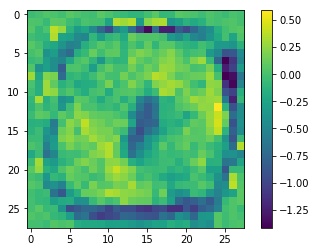

In [49]:
plt.imshow(model.get_weights()[0][:,0].reshape(28, 28))
plt.colorbar()

In [0]:
#Los pesos dibujados - no es un cero, dibujan el contorno del cero. Penaliza mucho si en medio, o el contorno. 